In [234]:
import cv2
print("imported cv")

imported cv


In [235]:
im = cv2.imread('images/fusion/Orca Camera Baseplate.png')

In [236]:
# imdenoised = cv2.medianBlur(im,5)
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(imgray,(9,9), sigmaX=0, sigmaY=0) 



In [237]:
edges = cv2.Canny(img_blur,100,200)
# sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

In [238]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [239]:
import numpy as np
imcontours = im.copy()
_ = cv2.drawContours(imcontours, contours, -1, (255,0,0), 3)

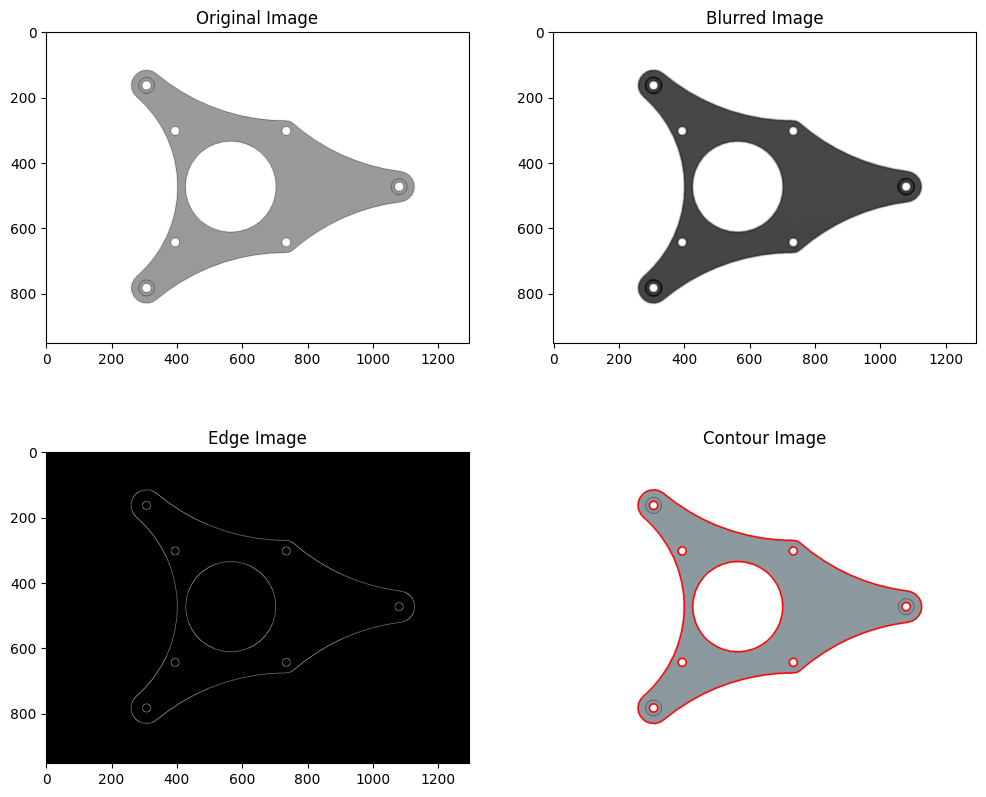

In [240]:
from matplotlib import pyplot as plt


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)  
plt.imshow(imgray, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(img_blur, cmap='gray')
plt.title('Blurred Image')

plt.subplot(2, 2, 3)  
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')

plt.subplot(2, 2, 4)  
plt.imshow(imcontours, cmap='gray')
plt.title('Contour Image')


# Empty subplot (4th position in this case)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
plt.axis('off')  # Hide this subplot

plt.show()

In [241]:
def filter_countours_by_arc_len(contours, min_perimeter):
    return [cnt for cnt in contours if cv2.arcLength(cnt, True) > min_perimeter]

def filter_countours_by_area(contours, min_area):
    return [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]


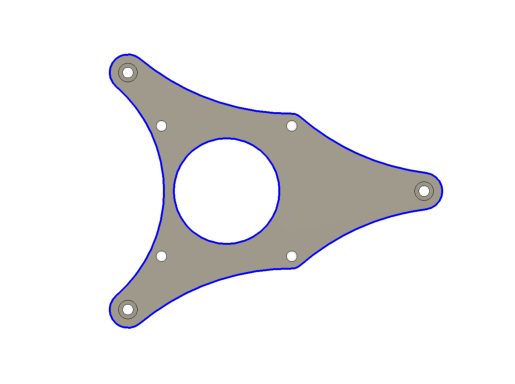

In [248]:
contours, hierarchry = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# filtered_contours = filter_countours_by_arc_len(contours, 100)
filtered_contours = filter_countours_by_area(contours, 20000)



filter_img = im.copy()

cv2.drawContours(filter_img, filtered_contours, -1, (255, 0, 0), 3)
plt.imshow(cv2.cvtColor(filter_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

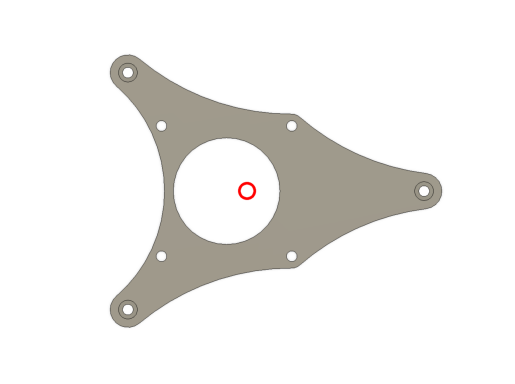

In [182]:
def point_in_contour(point, contour):
    return cv2.pointPolygonTest(contour, point, False) >= 0

def find_valid_centroid(c, contours, hierarchy, initial_cX, initial_cY, max_attempts=100):
    for _ in range(max_attempts):
        valid = True
        for i, (contour, h) in enumerate(zip(contours, hierarchy[0])):
            if h[3] == c:  # Check if current contour is a child
                if point_in_contour((initial_cX, initial_cY), contour):
                    valid = False
                    break

        if valid:
            return (initial_cX, initial_cY)

        # Sample a new point around the initial centroid
        offset = random.randint(-50, 50)
        new_cX = initial_cX + offset
        new_cY = initial_cY + offset

        # Ensure the point is within the image boundaries
        new_cX = min(max(new_cX, 0), filter_img.shape[1] - 1)
        new_cY = min(max(new_cY, 0), filter_img.shape[0] - 1)

        initial_cX, initial_cY = new_cX, new_cY

    # If no valid point found, return the original centroid
    return (initial_cX, initial_cY)


def calc_centroid(c):
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return (cX, cY)

filter_img = im.copy()
c = filtered_contours[0]

cX, cY = calc_centroid(c)

cv2.circle(filter_img, (cX, cY), 20, (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(filter_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


(1328, 1, 2)